In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pygwalker as pyg
from ydata_profiling import ProfileReport
# -----------------------------------------------------------

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import xgboost as xgb


#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
data=pd.read_csv('bank.csv')

# copy data

In [3]:
bank=data.copy()

# Preprocessing

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
bank['balance'].value_counts()

balance
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: count, Length: 3805, dtype: int64

In [9]:
bank['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

In [10]:
bank['duration'].value_counts()

duration
97      39
161     38
158     37
119     37
150     37
        ..
915      1
2029     1
1499     1
1399     1
1812     1
Name: count, Length: 1428, dtype: int64

In [11]:
bank['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [12]:
bank_dept=bank[bank['balance']<0]

In [13]:
bank_dept['balance'].value_counts()

balance
-1       9
-27      6
-46      6
-6       5
-32      5
        ..
-1050    1
-112     1
-1053    1
-2282    1
-134     1
Name: count, Length: 424, dtype: int64

In [14]:
bank_surplus=bank[bank['balance']>0]

In [15]:
bank_surplus['balance'].value_counts()


balance
1       39
3       35
2       34
4       29
5       27
        ..
3544     1
3143     1
1201     1
1960     1
2593     1
Name: count, Length: 3380, dtype: int64

In [16]:
bank_dept['pdays'] = bank_dept['pdays'].replace(-1, 0)

C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\4276923623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_dept['pdays'] = bank_dept['pdays'].replace(-1, 0)


In [17]:
bank_surplus['pdays'] = bank_surplus['pdays'].replace(-1, 0)

C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\612093023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_surplus['pdays'] = bank_surplus['pdays'].replace(-1, 0)


In [18]:
bank_dept.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
17,49,services,married,secondary,no,-8,yes,no,unknown,8,may,1119,1,0,0,unknown,yes
23,43,blue-collar,married,primary,no,-192,yes,no,unknown,8,may,1120,2,0,0,unknown,yes
30,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,0,0,unknown,yes
42,45,entrepreneur,divorced,tertiary,no,-395,yes,no,unknown,13,may,470,1,0,0,unknown,yes
59,57,technician,married,tertiary,no,-1,no,no,unknown,14,may,850,2,0,0,unknown,yes


In [19]:
bank_surplus.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,0,unknown,yes


# encoding data

In [391]:
from sklearn.preprocessing import LabelEncoder
for col in bank.columns:
    if bank[col].dtype=="object":
        encoder=LabelEncoder()
        bank[col]=encoder.fit_transform(bank[col])

In [20]:
from sklearn.preprocessing import LabelEncoder
for col in bank_surplus.columns:
    if bank_surplus[col].dtype=="object":
        encoder=LabelEncoder()
        bank_surplus[col]=encoder.fit_transform(bank_surplus[col])

C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\4011821394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_surplus[col]=encoder.fit_transform(bank_surplus[col])
C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\4011821394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_surplus[col]=encoder.fit_transform(bank_surplus[col])
C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\4011821394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [21]:
from sklearn.preprocessing import LabelEncoder
for col in bank_dept.columns:
    if bank_dept[col].dtype=="object":
        encoder=LabelEncoder()
        bank_dept[col]=encoder.fit_transform(bank_dept[col])

C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\462704218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_dept[col]=encoder.fit_transform(bank_dept[col])
C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\462704218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_dept[col]=encoder.fit_transform(bank_dept[col])
C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\462704218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(bank.corr(),annot=True,cmap='viridis')
plt.show()

ValueError: could not convert string to float: 'admin.'

<Figure size 2000x2000 with 0 Axes>

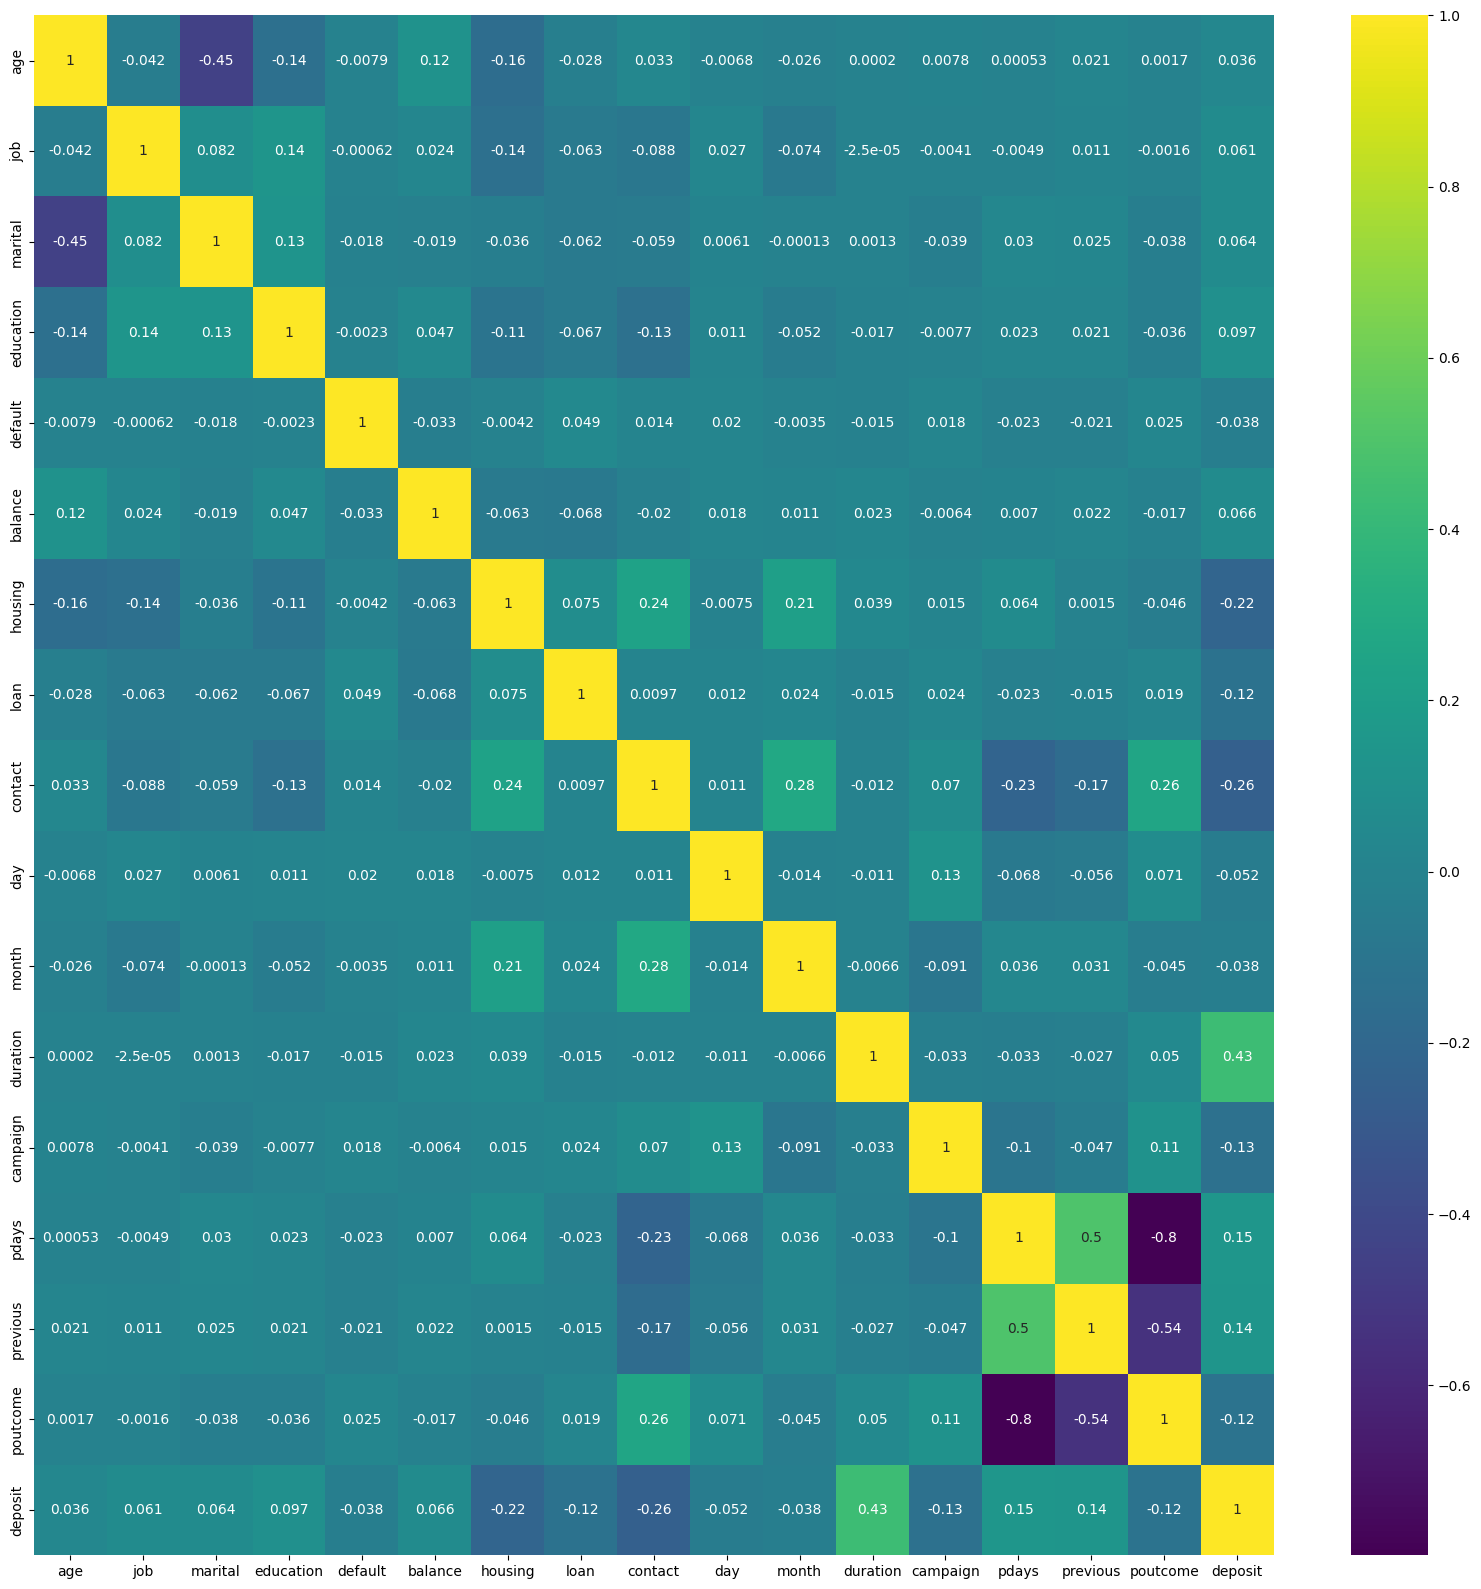

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(bank_surplus.corr(),annot=True,cmap='viridis')
plt.show()

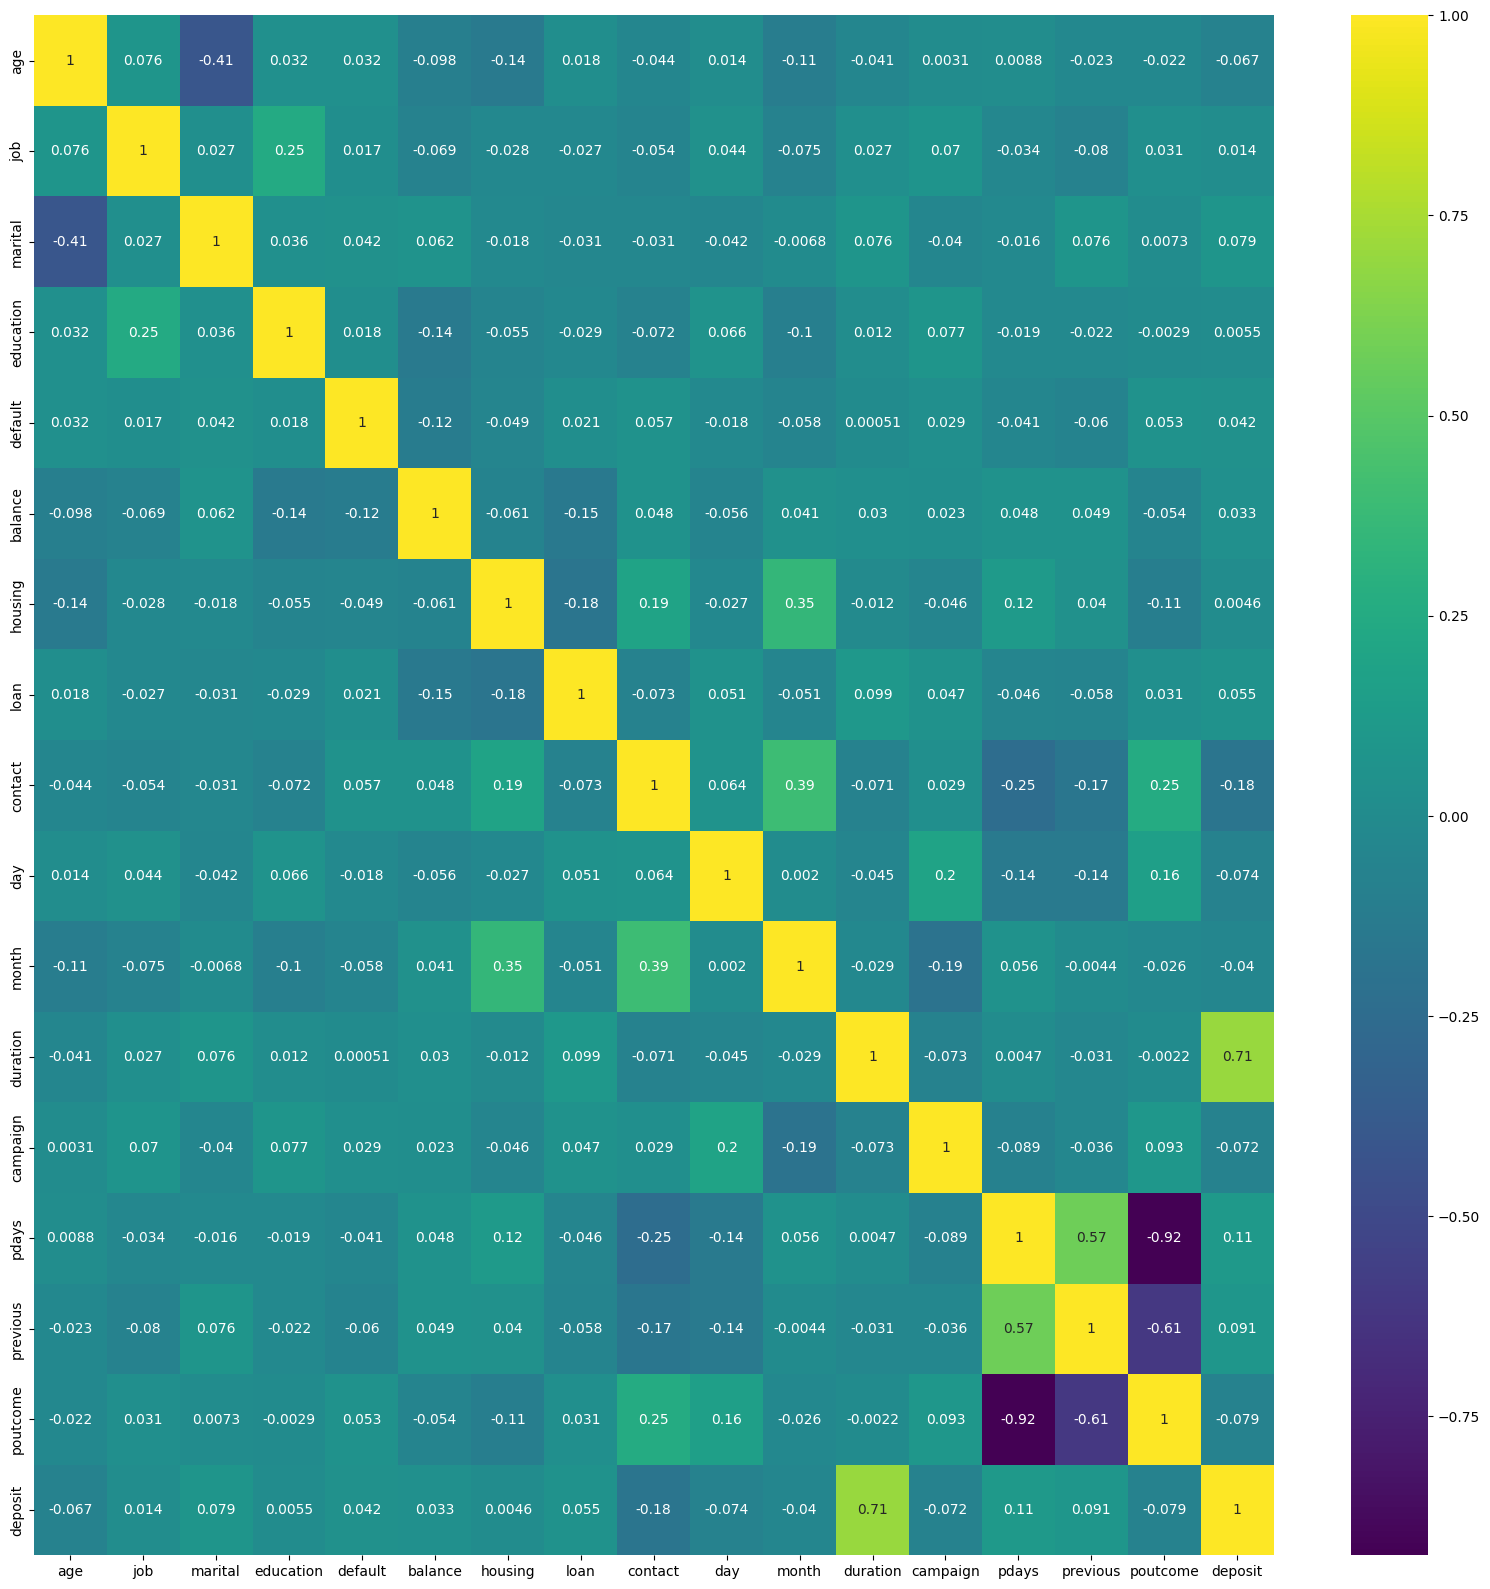

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(bank_dept.corr(),annot=True,cmap='viridis')
plt.show()

In [25]:
def handling_outliers(bank, lst_of_col):
    for i in lst_of_col:
        q1 = bank[i].quantile(0.25)
        q3 = bank[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr

        # Apply capping
        bank[i] = bank[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

    return bank

In [398]:
bank=handling_outliers(bank,bank.columns)


In [27]:
bank_surplus=handling_outliers(bank_surplus,bank_surplus.columns)


C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\2654544328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank[i] = bank[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\2654544328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank[i] = bank[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\2654544328.py:1

In [28]:
bank_dept=handling_outliers(bank_dept,bank_dept.columns)


C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\2654544328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank[i] = bank[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\2654544328.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank[i] = bank[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
C:\Users\ediab\AppData\Local\Temp\ipykernel_3496\2654544328.py:1

In [29]:
px.box(bank_surplus,x='balance')


In [153]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# EDA 

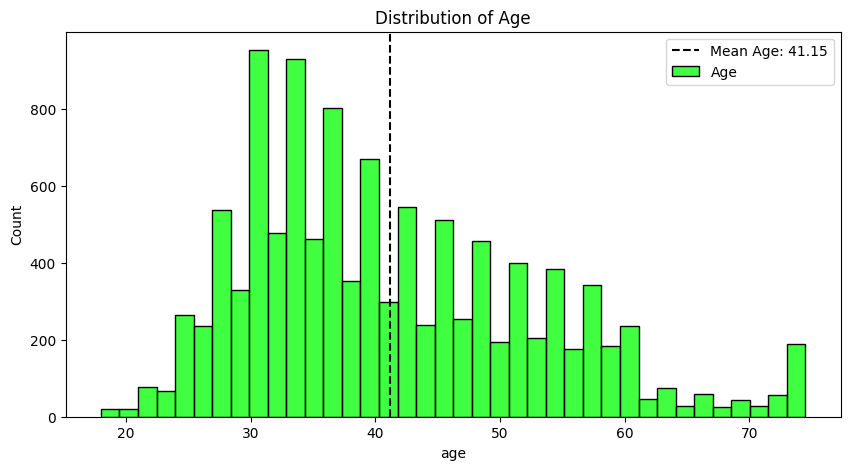

In [266]:
plt.figure(figsize=(10,5))
sns.histplot(x=bank['age'],color='Lime',label='Age')
plt.axvline(x=bank['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(bank['age'].mean(),2)))
plt.legend()

plt.title('Distribution of Age')
plt.show()

C:\Users\ediab\AppData\Local\Temp\ipykernel_1372\3948269142.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=bank['duration'],color='Lime',shade=True,label='Duration')


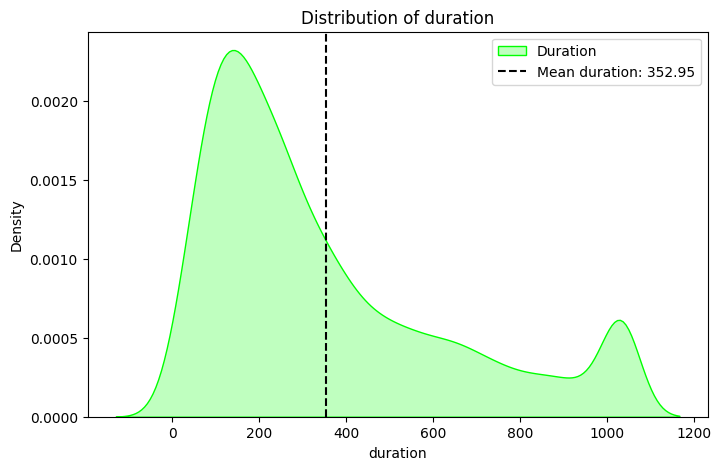

In [267]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=bank['duration'],color='Lime',shade=True,label='Duration')
plt.axvline(x=bank['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(bank['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

C:\Users\ediab\AppData\Local\Temp\ipykernel_1372\3516365341.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




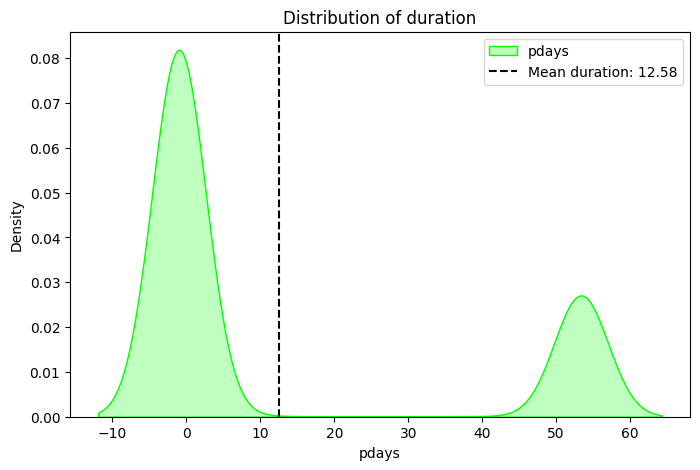

In [269]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=bank['pdays'],color='Lime',shade=True,label='pdays')
plt.axvline(x=bank['pdays'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(bank['pdays'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

In [293]:
job_counts = data['job'].value_counts().reset_index()
job_counts.columns = ['Job', 'Count']
fig = px.bar(job_counts, x='Job', y='Count', color='Job', text='Count', template='simple_white')
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

fig.show()

In [308]:
marital_counts = data['marital'].value_counts().reset_index()
marital_counts.columns = ['Marital-Status', 'Count']
fig = px.pie(marital_counts,  names='Marital-Status',  values='Count',  hole=0.4,  template='plotly_white',
             color_discrete_sequence=['Red', 'LightSeaGreen', 'SlateBlue'] )

# Step 4: Update the layout with centered title and legend customization
fig.update_layout( title_x=0.5, showlegend=True, legend_title_text='<b>Marital-Status', legend=dict( orientation='h',yanchor='bottom',y=1.02, xanchor='right',x=1))

# Step 5: Update traces with text position and display information
fig.update_traces( textposition='outside',  textinfo='percent+label')

# Step 6: Display the figure
fig.show()

In [309]:
education_counts = data['education'].value_counts().reset_index()
education_counts.columns = ['education', 'Count']
fig = px.bar(education_counts, x='education', y='Count', color='education', text='Count', template='simple_white')
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

fig.show()

In [319]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

fig = make_subplots(
    rows=1, 
    cols=3, 
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]], 
    subplot_titles=('Credit in Default', 'Housing Loan', 'Personal Loan')
)

# ----------------------------------------------------------------------------------------------------------------------------------

# Add Pie Chart for 'Credit in Default'
Credit_in_Default = data['default'].value_counts().reset_index()
Credit_in_Default.columns = ['Credit_in_Default', 'Count']
fig = px.pie(Credit_in_Default,  names='Credit_in_Default',  values='Count',  hole=0.4,  template='plotly_white', color_discrete_sequence=[ 'LightSeaGreen', 'SlateBlue'] )

# Step 4: Update the layout with centered title and legend customization
fig.update_layout( title_x=0.5, showlegend=True, legend_title_text='<b>Credit_in_Default', legend=dict( orientation='h',yanchor='bottom',y=1.02, xanchor='right',x=1))

# Step 5: Update traces with text position and display information
fig.update_traces( textposition='outside',  textinfo='percent+label')

# Step 6: Display the figure

fig.show()
# ----------------------------------------------------------------------------------------------------------------------------------

# Add Pie Chart for 'Housing Loan'
Housing_Loan = data['housing'].value_counts().reset_index()
Housing_Loan.columns = ['Housing_Loan', 'Count']
fig = px.pie(Housing_Loan,  names='Housing_Loan',  values='Count',  hole=0.4,  template='plotly_white',
             color_discrete_sequence=['LightSeaGreen', 'SlateBlue'] )

# Step 4: Update the layout with centered title and legend customization
fig.update_layout( title_x=0.5, showlegend=True, legend_title_text='<b>Housing_Loan', legend=dict( orientation='h',yanchor='bottom',y=1.02, xanchor='right',x=1))

# Step 5: Update traces with text position and display information
fig.update_traces( textposition='outside',  textinfo='percent+label')

# Step 6: Display the figure

fig.show()

# ----------------------------------------------------------------------------------------------------------------------------------
# Add Pie Chart for 'Personal Loan'
Personal_Loan = data['loan'].value_counts().reset_index()
Personal_Loan.columns = ['Personal_Loan', 'Count']
fig = px.pie(Personal_Loan,  names='Personal_Loan',  values='Count',  hole=0.4,  template='plotly_white',
             color_discrete_sequence=['LightSeaGreen', 'SlateBlue'] )

fig.update_layout( title_x=0.5, showlegend=True, legend_title_text='<b>Personal_Loan', legend=dict( orientation='h',yanchor='bottom',y=1.02, xanchor='right',x=1))

fig.update_traces( textposition='outside',  textinfo='percent+label')

fig.show()





In [322]:
deposite_count = data['deposit'].value_counts().reset_index()
deposite_count.columns = ['deposite_count', 'Count']
fig = px.pie(deposite_count,  names='deposite_count',  values='Count',  hole=0.4,  template='plotly_white',color_discrete_sequence=['LightSeaGreen', 'SlateBlue'] )

# Step 4: Update the layout with centered title and legend customization
fig.update_layout( title_x=0.5, showlegend=True, legend_title_text='<b>deposite_count', legend=dict( orientation='h',yanchor='bottom',y=1.02, xanchor='right',x=1))

# Step 5: Update traces with text position and display information
fig.update_traces( textposition='outside',  textinfo='percent+label')

# Step 6: Display the figure
fig.show()

In [461]:
a=data.groupby(['job'],as_index=False)['balance'].mean()
a['balance']=round(a['balance'],1)
fig=px.bar(a.sort_values(by='balance',ascending=False),x='job',y='balance',text='balance',color='job',template='ggplot2')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Average balance of the clients by their job type',legend_title_text='Job Type',font_family="Times New Roman",title_font_family="Times New Roman")

<Axes: xlabel='education', ylabel='balance'>

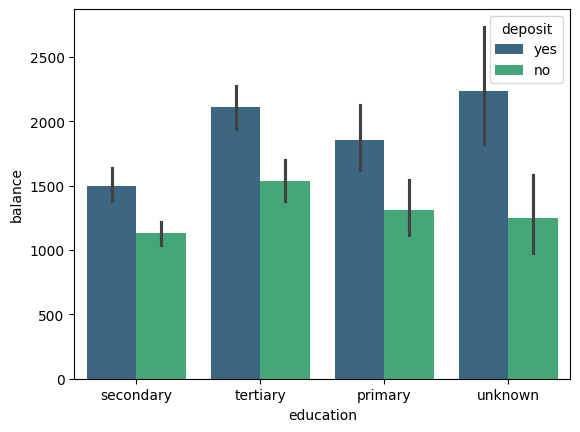

In [5]:
sns.barplot(data=data,x='education',y='balance',hue='deposit',palette='viridis')

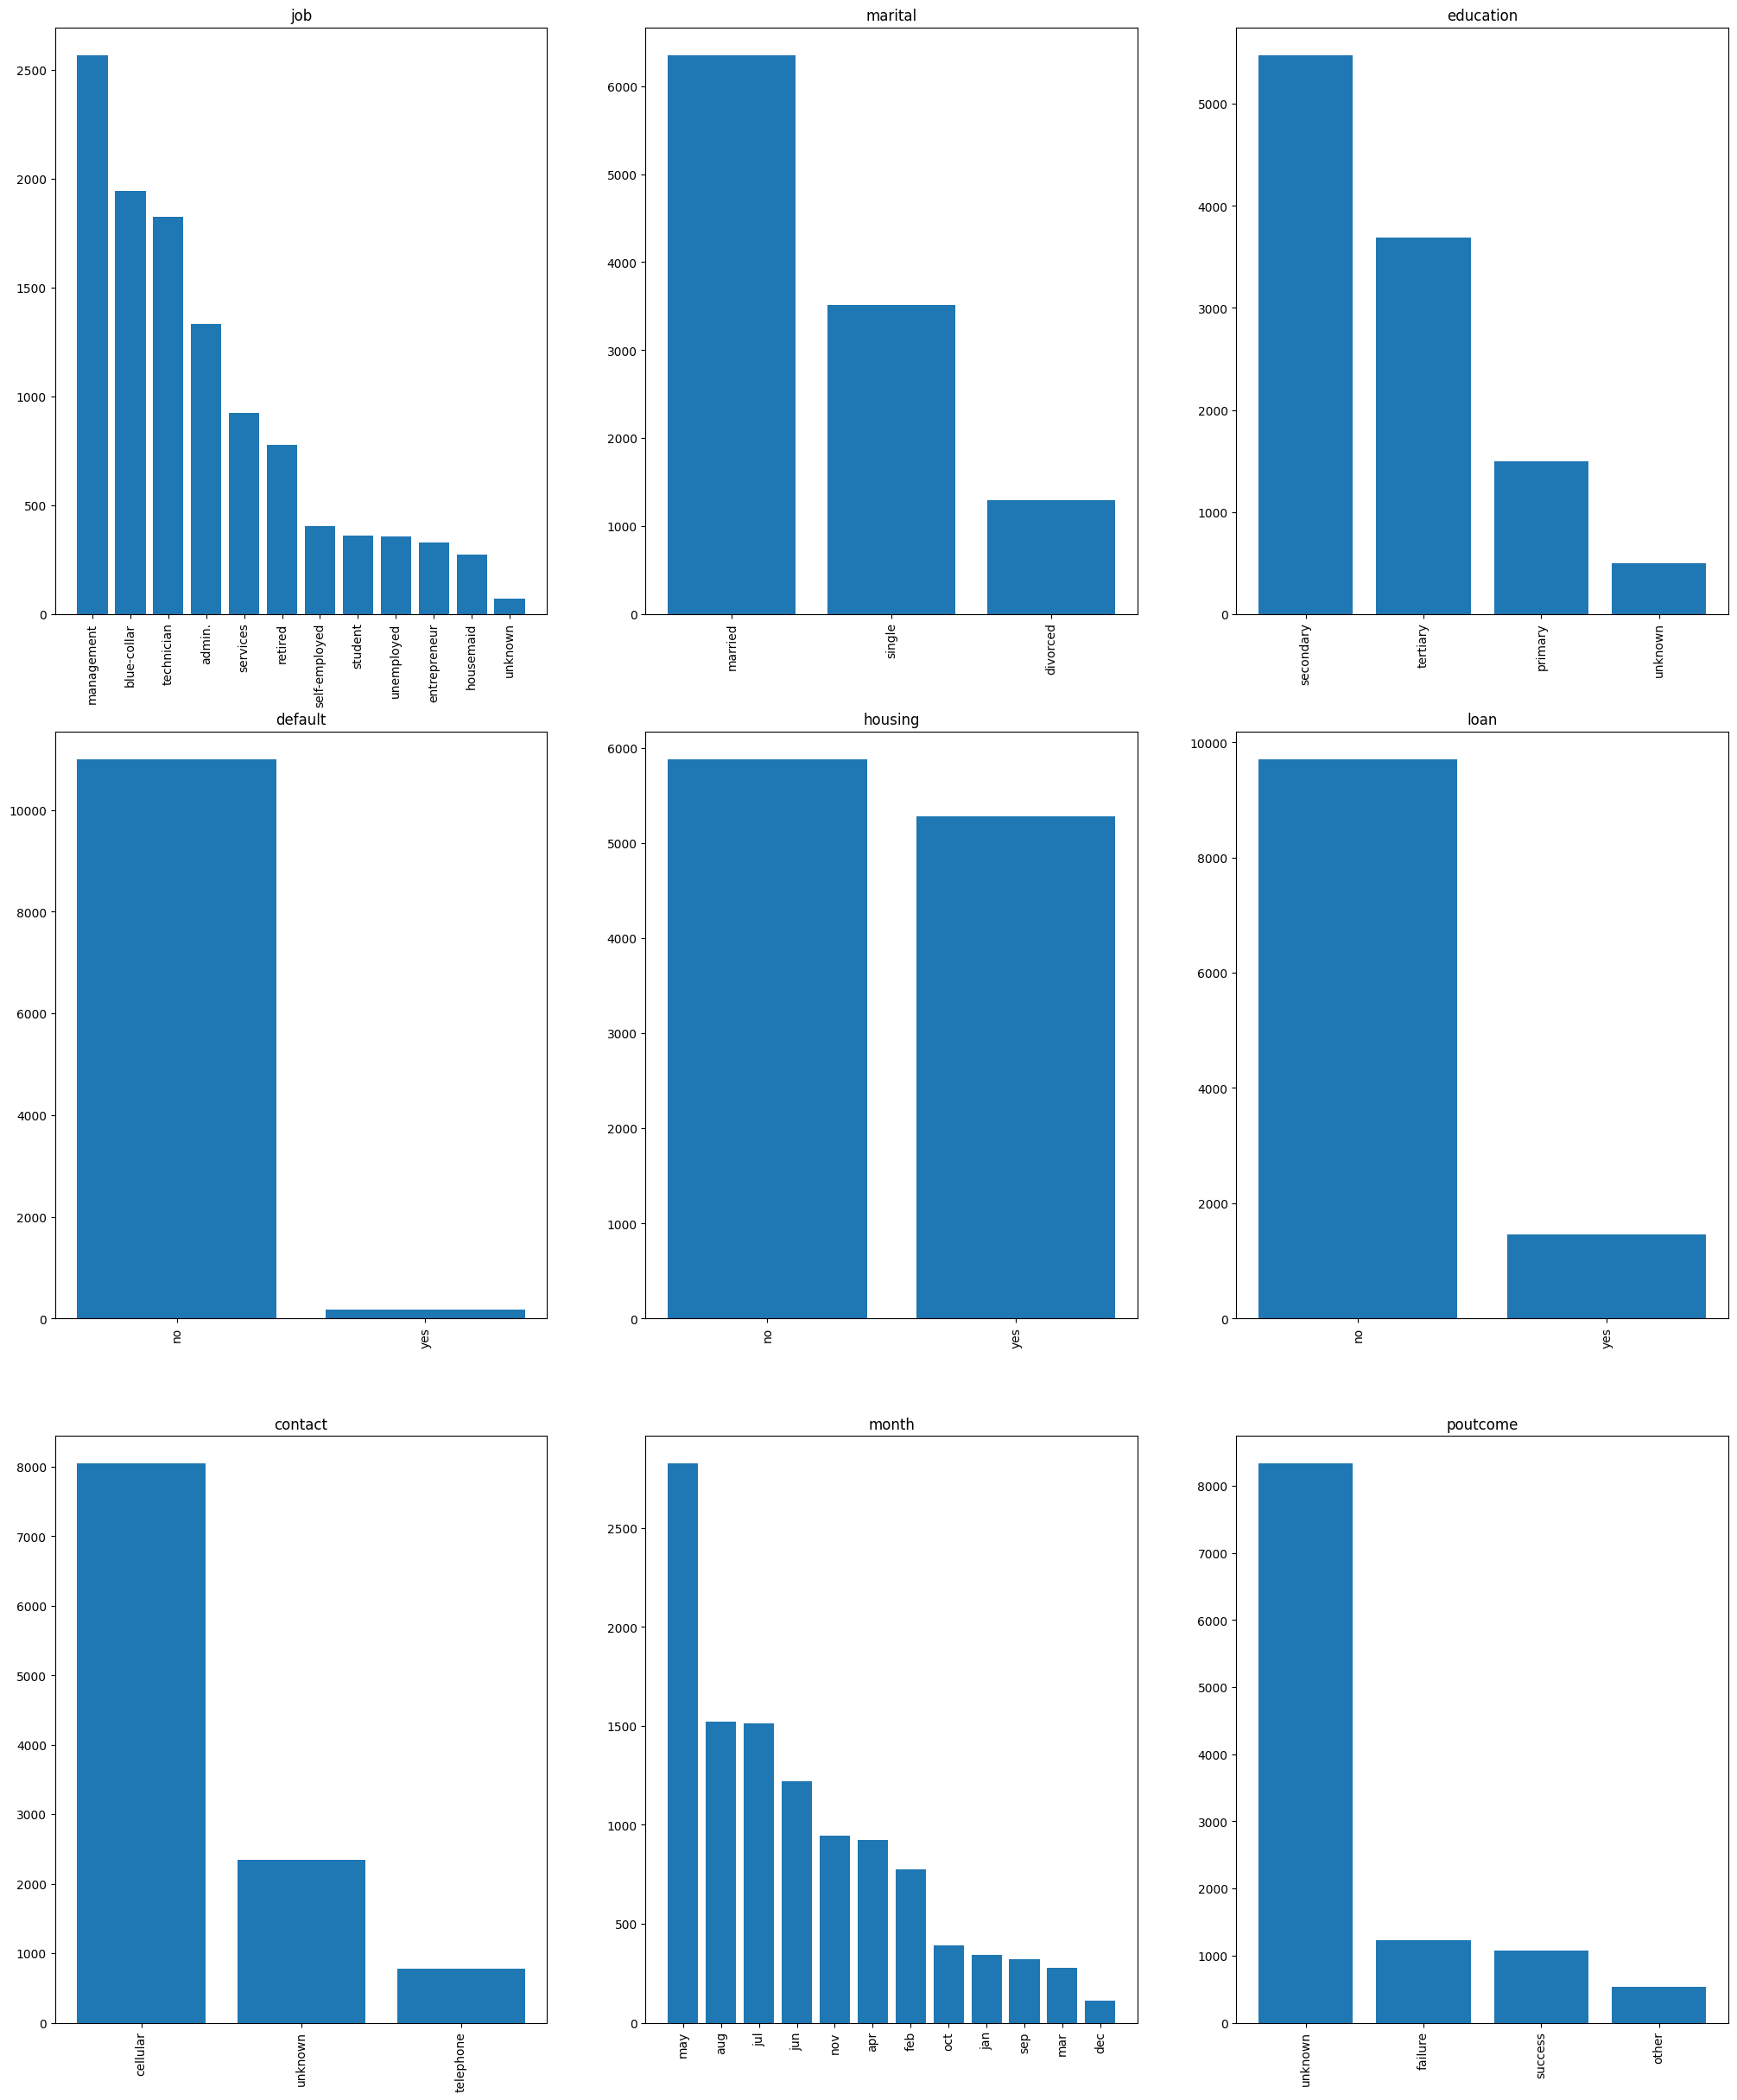

In [12]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(25, 30))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

<Axes: title={'center': 'Job and deposit'}, xlabel='job'>

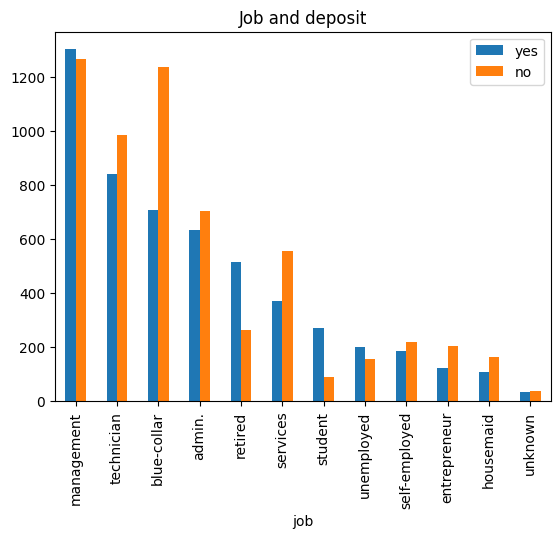

In [122]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<Axes: title={'center': 'Job and loan'}, xlabel='job'>

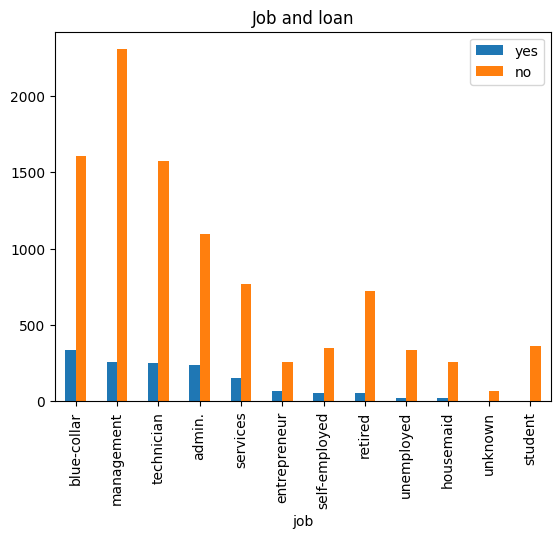

In [13]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['loan'] == 'yes']['job'].value_counts()
j_df['no'] = data[data['loan'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and loan')

<Axes: title={'center': 'Marital status and deposit'}, xlabel='marital'>

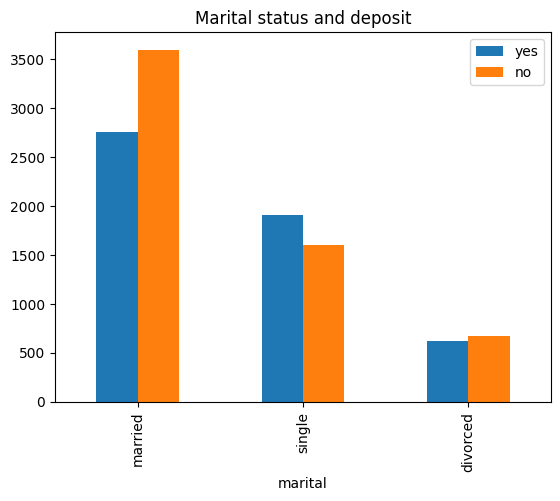

In [242]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<Axes: title={'center': 'Marital status and loan'}, xlabel='marital'>

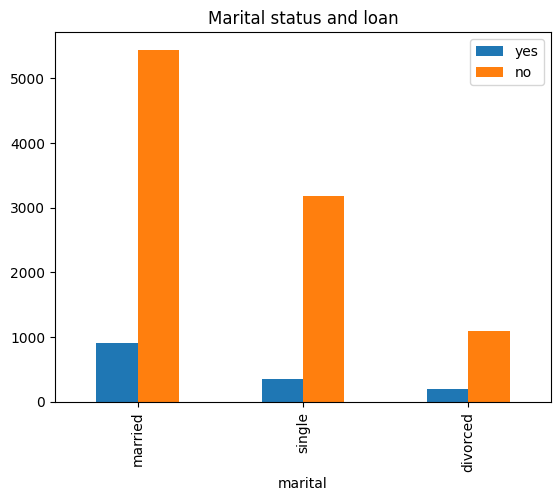

In [14]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['loan'] == 'yes']['marital'].value_counts()
j_df['no'] = data[data['loan'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and loan')

<Axes: title={'center': 'Education and deposit'}, xlabel='education'>

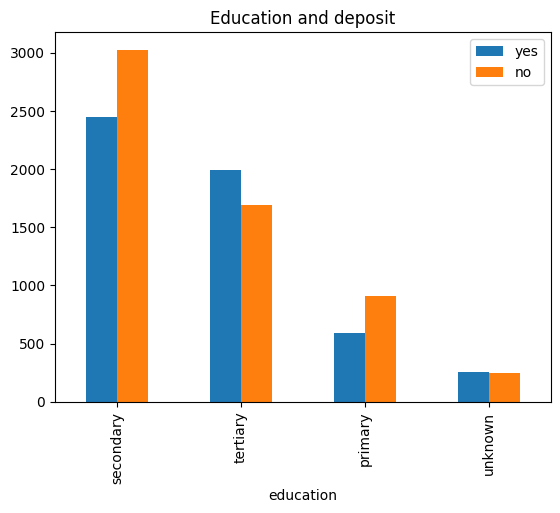

In [124]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<Axes: title={'center': 'Type of contact and deposit'}, xlabel='contact'>

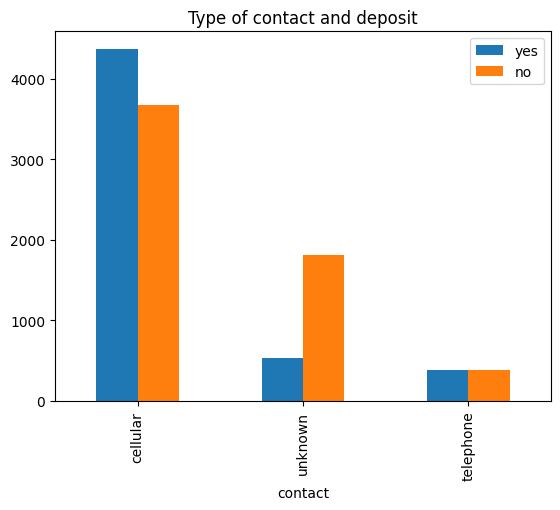

In [125]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

<Axes: >

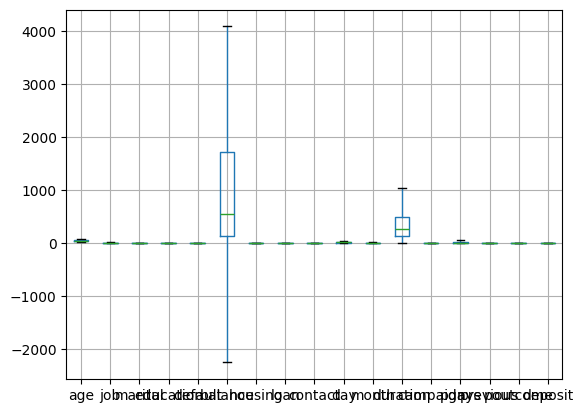

In [8]:
bank.boxplot()

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for i in bank.columns:
    bank[i]=scaler.fit_transform(bank[[i]])

In [7]:
bank['deposit'].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

# SPLITING DATA

In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [356]:
X=bank_surplus.drop(['deposit'],axis=1)
y=bank_surplus['deposit']

In [32]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59.0,0,1,1,0.0,2343.0,1,0.0,2,5,8,1022.5,1.0,0.0,0.0,3.0
1,56.0,0,1,1,0.0,45.0,0,0.0,2,5,8,1022.5,1.0,0.0,0.0,3.0
2,41.0,9,1,1,0.0,1270.0,1,0.0,2,5,8,1022.5,1.0,0.0,0.0,3.0
3,55.0,7,1,1,0.0,2476.0,1,0.0,2,5,8,579.0,1.0,0.0,0.0,3.0
4,54.0,0,1,2,0.0,184.0,0,0.0,2,5,8,673.0,2.0,0.0,0.0,3.0


# Resampling Data

In [110]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Undersampled dataset shape: {Counter(y_undersampled)}")

Original dataset shape: Counter({0: 4913, 1: 4787})
Undersampled dataset shape: Counter({0: 4787, 1: 4787})


In [360]:
from imblearn.combine import SMOTEENN
from collections import Counter 
smote_enn = SMOTEENN(random_state=42)
X_combined, y_combined = smote_enn.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Combined SMOTEENN dataset shape: {Counter(y_combined)}")


Original dataset shape: Counter({0: 4913, 1: 4787})
Combined SMOTEENN dataset shape: Counter({0: 2248, 1: 2013})


In [333]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample data
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled X:\n", X_resampled)
print("Resampled y:\n", y_resampled)


Resampled X:
             age  job  marital  education  default   balance  housing  loan  \
0     59.000000    0        1          1      0.0  0.502023        1   0.0   
1     56.000000    0        1          1      0.0  0.009432        0   0.0   
2     41.000000    9        1          1      0.0  0.272018        1   0.0   
3     55.000000    7        1          1      0.0  0.530532        1   0.0   
4     54.000000    0        1          2      0.0  0.039227        0   0.0   
...         ...  ...      ...        ...      ...       ...      ...   ...   
9821  34.028772    9        2          1      0.0  0.355642        0   0.0   
9822  41.103152    7        0          1      0.0  0.206653        1   0.0   
9823  43.994457    9        2          1      0.0  0.052335        0   0.0   
9824  37.000000    4        1          2      0.0  0.137313        0   0.0   
9825  48.036151    1        1          1      0.0  0.069454        1   0.0   

      contact  day  month  duration  campaign    

# standard scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()


In [468]:
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()


In [471]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
columns_to_scale = ['balance', 'duration','pdays']


In [345]:
# Fit and transform only the selected columns
X_combined[columns_to_scale] = scaler1.fit_transform(X_combined[columns_to_scale])


In [39]:
from sklearn.model_selection import train_test_split

In [346]:
X_train,X_test,y_train,y_test=train_test_split(X_combined,y_combined,test_size=0.2,random_state=42)

In [347]:
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

# Modeling for surplus

# KNN 

In [348]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [349]:
y_pred=classifier.predict(X_test)

In [350]:
cm1= confusion_matrix(y_test, y_pred)
print(cm1)
accuracy_score(y_test,y_pred)

[[303  30]
 [ 41 241]]


0.8845528455284553

In [226]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

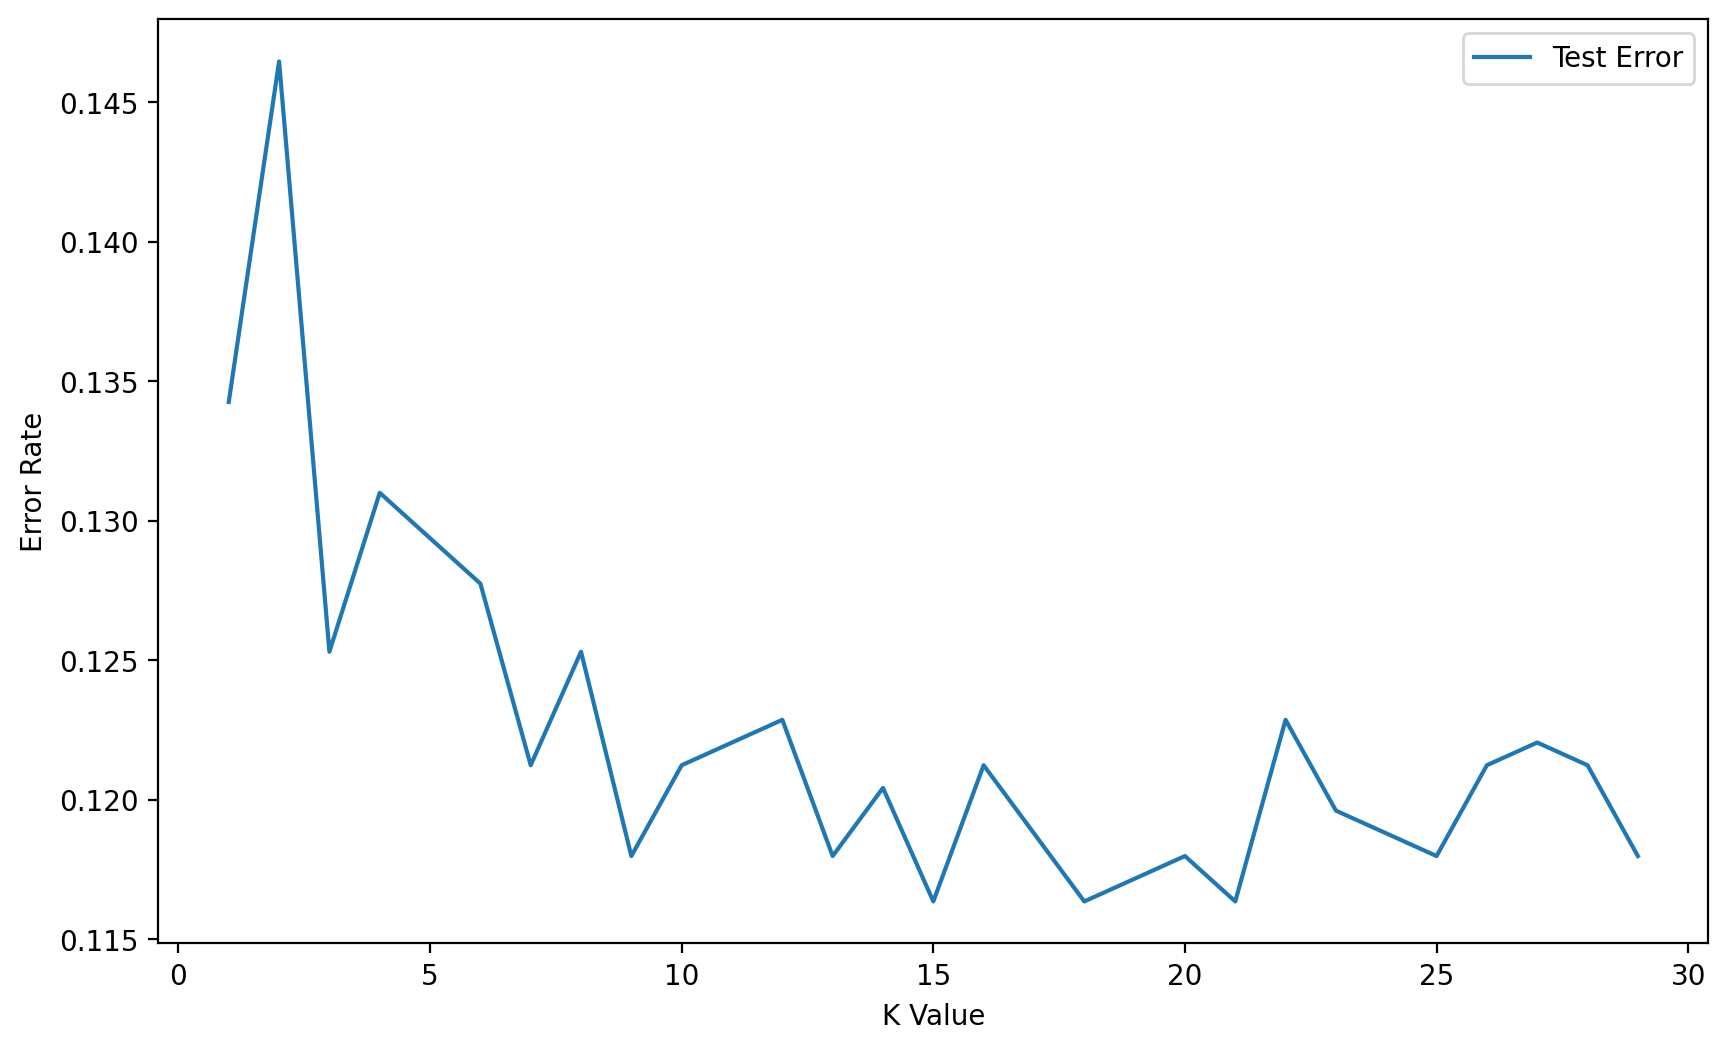

In [227]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

# Decision Tree

In [550]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'gini',random_state = 42,max_depth=None,min_samples_leaf=1,min_samples_split=5)
classifier1.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=42)

In [551]:
y_pred_dec=classifier1.predict(X_test)

In [552]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred_dec)

[[810 169]
 [233 728]]


0.7690721649484537

# Random Forest

In [351]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators =300 ,criterion = 'gini', random_state = 42,max_depth=50,min_samples_leaf=1,min_samples_split=5)
classifier2.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [352]:
y_pred_rf=classifier2.predict(X_test)

In [353]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred_rf)

[[303  30]
 [ 41 241]]


0.9398373983739837

# svm

In [292]:
from sklearn.svm import SVC

In [309]:
svc_model=SVC(C=15)

In [310]:
svc_model.fit(X_train,y_train)

SVC(C=15)

In [311]:
y_pred_svc=svc_model.predict(X_test)

In [312]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred_svc)

[[301  32]
 [ 42 240]]


0.8764227642276423

# svc rbf

In [313]:
svc_model1 = SVC(kernel = 'rbf', random_state = 42,C=5)

In [314]:
svc_model1.fit(X_train,y_train)

SVC(C=5, random_state=42)

In [315]:
y_pred_svc1=svc_model1.predict(X_test)

In [316]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred_svc1)

[[301  32]
 [ 42 240]]


0.8617886178861789

# svm poly

In [237]:
svc_model1 = SVC(kernel = 'poly', random_state = 0,C=5,degree=4)

In [238]:
svc_model1.fit(X_train,y_train)

SVC(C=5, degree=4, kernel='poly', random_state=0)

In [239]:
y_pred_svc1=svc_model1.predict(X_test)

In [240]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred_svc1)

[[986 180]
 [251 816]]


0.7895208240035826

# logistic 

In [317]:
from sklearn.linear_model import LogisticRegression

In [318]:
log=LogisticRegression()

In [319]:
log.fit(X_train,y_train)

c:\Users\ediab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [320]:
y_pred_log=log.predict(X_test)

In [321]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred_log)

[[301  32]
 [ 42 240]]


0.8520325203252033

# xgboost

In [322]:
gb = xgb.XGBClassifier( n_estimators=100,learning_rate=0.08, gamma=0,subsample=0.75,colsample_bytree=1, max_depth=10)

In [323]:
gb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [324]:
y_test_preds = gb.predict(X_test)

In [325]:
accuracy_score(y_test, y_test_preds)

0.9479674796747968

In [152]:
from xgboost import XGBClassifier

# XGBoost with scale_pos_weight parameter
model = XGBClassifier(scale_pos_weight=len(y[y == 0]) / len(y[y == 1]), random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1464
           1       0.83      0.87      0.85      1446

    accuracy                           0.85      2910
   macro avg       0.85      0.85      0.85      2910
weighted avg       0.85      0.85      0.85      2910



0.8484536082474227

In [523]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Initialize the model
model = LogisticRegression(max_iter=500)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())
accuracy_score(y_test,y_pred)


Cross-Validation Scores: [0.75051546 0.73865979 0.76443299 0.81649485 0.78298969]
Mean Cross-Validation Score: 0.7706185567010309


0.8484536082474227

# GridSearchCV

In [231]:
from sklearn.model_selection import GridSearchCV


# Define the model
model = SVC()

# Define the hyperparameters and their values to try
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator (model with the best combination of hyperparameters)
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\ediab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ediab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ediab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ediab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Test Accuracy: 0.8065671641791045


In [332]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their values to try
param_grid = {
    'n_estimators': [100, 200,300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30,100],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator (model with the best combination of hyperparameters)
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


c:\Users\ediab\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9333333333333333


In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the model
model = SVC(kernel='poly', random_state=42)

# Define the hyperparameters and their values to try
param_grid = {
    'C': [0.1, 1, 4, 5,10],          # Regularization parameter
    'degree': [2, 3, 4, 5],          # Degree of the polynomial kernel
    'gamma': ['scale', 'auto'],      # Kernel coefficient
    'coef0': [0, 1, 10],             # Independent term in kernel function (only for 'poly' kernel)
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator (model with the best combination of hyperparameters)
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the model
knn_model = KNeighborsClassifier()

# Define the hyperparameters and their values to try
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric (1=Manhattan, 2=Euclidean)
}

# Set up the grid search
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using grid search
knn_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("KNN Best Hyperparameters:", knn_grid_search.best_params_)

# Best estimator (model with the best combination of hyperparameters)
best_knn_model = knn_grid_search.best_estimator_

# Predict on the test data
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Test Accuracy:", knn_accuracy)


In [ ]:
from sklearn.svm import SVC

# Define the model
svc_rbf_model = SVC(kernel='rbf', random_state=42)

# Define the hyperparameters and their values to try
svc_rbf_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient
}

# Set up the grid search
svc_rbf_grid_search = GridSearchCV(estimator=svc_rbf_model, param_grid=svc_rbf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using grid search
svc_rbf_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("SVC RBF Best Hyperparameters:", svc_rbf_grid_search.best_params_)

# Best estimator (model with the best combination of hyperparameters)
best_svc_rbf_model = svc_rbf_grid_search.best_estimator_

# Predict on the test data
y_pred_svc_rbf = best_svc_rbf_model.predict(X_test)

# Evaluate the model
svc_rbf_accuracy = accuracy_score(y_test, y_pred_svc_rbf)
print("SVC RBF Test Accuracy:", svc_rbf_accuracy)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their values to try
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'], # Function to measure the quality of a split
}

# Set up the grid search
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using grid search
dt_grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Decision Tree Best Hyperparameters:", dt_grid_search.best_params_)

# Best estimator (model with the best combination of hyperparameters)
best_dt_model = dt_grid_search.best_estimator_

# Predict on the test data
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy:", dt_accuracy)


# modeling for dept

In [357]:
X1=bank_dept.drop(['deposit'],axis=1)
y1=bank_dept['deposit']

In [359]:
from imblearn.combine import SMOTEENN
from collections import Counter 
smote_enn = SMOTEENN(random_state=42)
X_combined1, y_combined1 = smote_enn.fit_resample(X1, y1)

print(f"Original dataset shape: {Counter(y1)}")
print(f"Combined SMOTEENN dataset shape: {Counter(y_combined)}")


Original dataset shape: Counter({0: 478, 1: 210})
Combined SMOTEENN dataset shape: Counter({1: 388, 0: 363})


In [361]:
# Fit and transform only the selected columns
X_combined1[columns_to_scale] = scaler1.fit_transform(X_combined1[columns_to_scale])


In [368]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_combined1,y_combined1,test_size=0.3,random_state=42)

In [369]:
# Fit and transform only the selected columnsX_train = scaler1.fit_transform(X_train)
X_train1 = scaler1.fit_transform(X_train)
X_test1 = scaler1.transform(X_test)

# Random Forest

In [370]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators =300 ,criterion = 'gini', random_state = 42,max_depth=50,min_samples_leaf=1,min_samples_split=5)
classifier2.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [371]:
y_pred_rf1=classifier2.predict(X_test1)

In [372]:
cm2 = confusion_matrix(y_test1, y_pred_rf1)
print(cm2)
accuracy_score(y_test, y_pred_rf1)

[[115   2]
 [  1 108]]


0.9867256637168141